In [2]:
import pandas as pd
# from sklearn.feature_extraction.text import CountVectorizer

full = pd.read_csv("../../data/poptrag_lyrics_genres_corpus_filtered_english_lemmatized.csv")
full.info()

# top 20 most common words in the lyrics
# def print_most_common_words(corpus, lyrics_column, top_n=20):
#     vectorizer = CountVectorizer(
#                 ngram_range=(1, 1),
#                 token_pattern=r"\b[\w']+\b",
#                 lowercase=True,
#             )
#     matrix = vectorizer.fit_transform(full[lyrics_column])
#     sum_words = matrix.sum(axis=0)
#     words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
#     words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
#     print(words_freq[:20])

# print_most_common_words(full, "full_lyrics")
# print("=" * 60)
# print_most_common_words(full, "lyrics_lemmatized")

<class 'pandas.DataFrame'>
RangeIndex: 111938 entries, 0 to 111937
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                111938 non-null  int64  
 1   track.s.id                111938 non-null  str    
 2   track.s.title             111937 non-null  str    
 3   track.s.firstartist.name  111938 non-null  str    
 4   album.s.title             111938 non-null  str    
 5   album.s.releaseyear       111938 non-null  int64  
 6   track.s.popularity        111938 non-null  int64  
 7   track.language            111938 non-null  str    
 8   full_lyrics               111938 non-null  str    
 9   cat5                      111938 non-null  str    
 10  pmax5                     111938 non-null  float64
 11  nmax5                     111938 non-null  float64
 12  cat12                     111938 non-null  str    
 13  pmax12                    111938 non-null  float64
 14 

In [ ]:
from helpers.LyricsClassficationExperiment import LyricsClassificationExperiment

exp_fs = LyricsClassificationExperiment(
    corpus=full, 
    genrecol="cat12",
    lyricscol="full_lyrics", 
    artistcol="track.s.firstartist.name",
    yearcol="album.s.releaseyear", 
    output_dir="cat5_mock_experiment_fs",
    test_size=0.2,
    random_state=42, 
    subsample_debug=0.05,
)
exp_fs.compute_fs_ngram_features(min_artists=20, top_n_per_genre_and_ngram=100)
fs_features = exp_fs.X_train.keys()
print(exp_fs)
print(type(exp_fs.X_train))
exp_fs.train_fixed_parametrer_logistic_regression()
exp_fs.show_model_evaluation()
exp_fs.show_top_coefficients_per_genre()

Extracted unigrams:
  - Unique: 21,575
  - Shape: (4458, 21575)
  - Examples: ['wives', 'colt', 'antibiotics', 'huckleberry', 'grams']
Extracted bigrams:
  - Unique: 194,350
  - Shape: (4458, 194350)
  - Examples: ['to department', "castaway i'll", 'all wanting', 'her lively', 'going unconditional']
Extracted trigrams:
  - Unique: 410,566
  - Shape: (4458, 410566)
  - Examples: ["things you've always", 'calling save me', 'air to soothe', 'working on the', 'hotter in your']
Calculating genre-level TF-IDF for unigrams with genre ...
Calculated TF-IDF for 51,624 genre-ngram pairs
Calculating genre-level TF-IDF for bigrams with genre ...
Calculated TF-IDF for 285,738 genre-ngram pairs
Calculating genre-level TF-IDF for trigrams with genre ...
Calculated TF-IDF for 467,138 genre-ngram pairs
Counting artists per n-gram...
  10% complete
  20% complete
  30% complete
  40% complete
  50% complete
  60% complete
  70% complete
  80% complete
  90% complete
Calculated artist diversity for 21,57

N:\Materialien\Promotion\LyricsGenreRecognition\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
from helpers.LyricsClassficationExperiment import LyricsClassificationExperiment

exp_informed = LyricsClassificationExperiment(
    corpus=full,
    genrecol="cat12",
    lyricscol="lyrics_lemmatized",
    artistcol="track.s.firstartist.name",
    yearcol="album.s.releaseyear",
    output_dir="cat5_mock_experiment_informed",
    test_size=0.2,
    random_state=42,
    subsample_debug=0.05,
)
exp_informed.compute_idiom_ngram_features(min_artists=20, llr_treshold=10, top_n_per_genre=300) # to be similar to FS (2014)
print(exp_informed)
print(type(exp_informed.X_train))
exp_informed.train_fixed_parametrer_logistic_regression()
exp_informed.show_model_evaluation()

Step 1: Extracting and scoring n-grams per genre...
Extracted 167705 unique bigrams, 380098 unique trigrams
Filtered to 2006 n-grams (>= 20 artists, no stopwords)
Filtered to 417 n-grams (>= 20 artists, no stopwords)
Selected 311 bigrams and 227 trigrams across genres

Step 2: Replacing n-grams in corpus...

Step 3: Extracting unigrams from replaced corpus...
Extracted 1322 unigrams meeting criteria

Step 4: Ranking all tokens via TF-IDF...

Final vocabulary size: 1216
LyricsClassificationExperiment with 11 genres
Train size: 4458 samples
Test size: 1138 samples
# of features: 1216
Feature type: Informed N-grams (top 300 per genre, min. 20 artists)
Model not yet trained.
Output directory: cat5_mock_experiment_informed

<class 'pandas.DataFrame'>
Training pipeline with fixed parameters...
Selected model parameters:
  C: 1.000
  l1_ratio: 0.500
  target_ratio: 3.000
F1 macro: 0.212
Precision macro: 0.222
Recall macro: 0.222
Cohen's kappa: 0.158
                  precision    recall  f1-s

N:\Materialien\Promotion\LyricsGenreRecognition\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [75]:
exp_informed.show_top_coefficients_per_genre()

Top 10 coefficients for genre: ALTERNATIVE ROCK
hand (0.458)
grace (0.426)
distance (0.410)
metal (0.407)
pretend (0.394)
conquer (0.380)
world (-0.377)
root (0.358)
lightning (0.355)
moment (-0.346)


Top 10 coefficients for genre: ELECTRONIC
your_way (-0.623)
man (-0.568)
clear (-0.547)
believe (-0.518)
you_get_to (0.503)
you_walk (0.503)
family (0.496)
cat (0.493)
day (0.480)
golden (-0.479)


Top 10 coefficients for genre: HARD ROCK
madness (0.464)
thrill (0.432)
that_make (0.412)
spot (0.363)
leave (0.357)
appear (0.353)
the_key (0.343)
fade (0.335)
wheel (0.334)
the_song (0.329)


Top 10 coefficients for genre: HEAVY METAL
oh_baby (0.560)
gonna (0.451)
in_life (0.420)
the_fear (0.394)
attack (0.383)
spell (0.364)
no_time_to (0.355)
fail (0.349)
i_keep (-0.332)
luck (0.331)


Top 10 coefficients for genre: HIP HOP
nigga (0.581)
true (0.426)
em (0.419)
i_get_a (0.408)
rap (0.406)
shit (0.399)
man (0.375)
money (0.362)
dollar (0.362)
let_me (0.357)


Top 10 coefficients for genre: I

In [3]:
from helpers.LyricsClassficationExperiment import LyricsClassificationExperiment

exp_topics = LyricsClassificationExperiment(
    corpus=full,
    genrecol="cat12",
    lyricscol="lyrics_lemmatized",
    artistcol="track.s.firstartist.name",
    yearcol="album.s.releaseyear",
    output_dir="cat5_mock_experiment_informed",
    test_size=0.2,
    random_state=42,
    # subsample_debug=0.01,
)
exp_topics.compute_idiom_ngram_features(min_artists=20, min_tracks=0, llr_threshold=10, top_n_per_ngram_pergenre=100)
# exp_topics.corpus_train_replaced.to_csv("corpus_train_replaced_toR.csv", index=False)
# exp_topics.corpus_test_replaced.to_csv("corpus_test_replaced_toR.csv", index=False)

Extracting and scoring n-grams per genre...
Extracted 1456571 unique bigrams, 4943702 unique trigrams, 8121061 unique quadgrams
Filtered to 39594 n-grams (>= 20 artists, >= 0 tracks, no stopwords)
Filtered to 35942 n-grams (>= 20 artists, >= 0 tracks, no stopwords)
Filtered to 9670 n-grams (>= 20 artists, >= 0 tracks, no stopwords)
Selected 29490 bigrams, 35942 trigrams, and 9670 quadgrams across genres

Replacing n-grams in corpus...

Ranking tokens via TF-IDF per n-gram type...

Final vocabulary size: 1678


In [4]:
def pool_by_artist(dtm, corpus, artist_col="artist"):
    artist_groups = corpus.groupby(artist_col).groups
    pooled = np.array([dtm[indices].sum(axis=0) for indices in artist_groups.values()])
    return pooled, list(artist_groups.keys())


X_pooled, artists = pool_by_artist(
    exp_topics.X_train.to_numpy(), exp_topics.corpus_train, artist_col="artist"
)
print(f"Original shape: {exp_topics.X_train.shape}")
print(f"Pooled shape: {X_pooled.shape}")

Original shape: (89012, 1678)
Pooled shape: (5389, 1678)


In [5]:
import lda
import numpy as np

# need to pool documents by artist

# X: document-term matrix (n_docs x n_terms)
k_topics = 8
model = lda.LDA(n_topics=k_topics, n_iter=1500, random_state=42)  # number of Gibbs iterations
model.fit(X_pooled)

doc_topic = model.doc_topic_  # theta: documents × topics
topic_word = model.topic_word_  # phi: topics × words

INFO:lda:n_documents: 5389
INFO:lda:vocab_size: 1678
INFO:lda:n_words: 376033
INFO:lda:n_topics: 8
INFO:lda:n_iter: 1500
INFO:lda:<0> log likelihood: -3508464
INFO:lda:<10> log likelihood: -2986190
INFO:lda:<20> log likelihood: -2886325
INFO:lda:<30> log likelihood: -2850966
INFO:lda:<40> log likelihood: -2829537
INFO:lda:<50> log likelihood: -2817001
INFO:lda:<60> log likelihood: -2808308
INFO:lda:<70> log likelihood: -2801166
INFO:lda:<80> log likelihood: -2796067
INFO:lda:<90> log likelihood: -2791737
INFO:lda:<100> log likelihood: -2788417
INFO:lda:<110> log likelihood: -2784166
INFO:lda:<120> log likelihood: -2781585
INFO:lda:<130> log likelihood: -2779853
INFO:lda:<140> log likelihood: -2778395
INFO:lda:<150> log likelihood: -2776003
INFO:lda:<160> log likelihood: -2772070
INFO:lda:<170> log likelihood: -2770685
INFO:lda:<180> log likelihood: -2769418
INFO:lda:<190> log likelihood: -2767328
INFO:lda:<200> log likelihood: -2766786
INFO:lda:<210> log likelihood: -2764827
INFO:lda:<

In [30]:
import numpy as np
from itertools import combinations


def js_divergence(p, q):
    m = 0.5 * (p + q)
    # add small epsilon to avoid log(0)
    eps = 1e-12
    p = np.clip(p, eps, 1)
    q = np.clip(q, eps, 1)
    m = np.clip(m, eps, 1)
    kl_pm = np.sum(p * np.log(p / m))
    kl_qm = np.sum(q * np.log(q / m))
    return 0.5 * (kl_pm + kl_qm)


def deveaud2014(topic_word):
    K = topic_word.shape[0]
    divs = []
    for i, j in combinations(range(K), 2):
        divs.append(js_divergence(topic_word[i], topic_word[j]))
    return np.mean(divs)


score = deveaud2014(topic_word)
print(score)
# .Romain Deveaud, Éric SanJuan, and Patrice Bellot. 2014. Accurate and effective latent concept modeling for ad hoc information retrieval. Document numérique 17, 1: 61–84. http://doi.org/10.3166/dn.17.1.61-84

0.5021015854740217


In [6]:
import numpy as np
import pandas as pd


def compute_frex(topic_word, w=0.5):
    """
    Compute FREX scores: weighted combination of word probability and exclusivity.

    FREX balances frequency (how often a word appears in a topic) with
    exclusivity (how unique the word is to that topic).

    Args:
        topic_word: K x V matrix of topic-word probabilities
        w: weight parameter (0.5 = equal weight to frequency and exclusivity)
    """
    prob = topic_word
    exclusivity = 1 / np.sum(topic_word > 0, axis=0)
    exclusivity = np.tile(exclusivity, (topic_word.shape[0], 1))

    prob_rank = np.argsort(np.argsort(-prob, axis=1), axis=1) + 1
    excl_rank = np.argsort(np.argsort(-exclusivity, axis=1), axis=1) + 1

    frex = 1 / (w / prob_rank + (1 - w) / excl_rank)
    return frex


def compute_lift(topic_word):
    """
    Compute Lift scores: topic-word probability divided by marginal word probability.

    Shows how much more likely a word is to appear in this topic versus overall.
    """
    marginal = np.mean(topic_word, axis=0)
    lift = topic_word / (marginal + 1e-12)
    return lift


def compute_score(topic_word):
    """
    Compute Score metric: log of topic probability minus log of average probability.

    Similar to log-odds ratio against background distribution.
    """
    marginal = np.mean(topic_word, axis=0)
    score = np.log(topic_word + 1e-12) - np.log(marginal + 1e-12)
    return score


def show_top_words_all_metrics(topic_word, vocab, n_words=10):
    """
    Display top words for each topic according to multiple metrics.

    Args:
        topic_word: K x V matrix of topic-word probabilities
        vocab: list of vocabulary terms
        n_words: number of top words to display per metric
    """
    frex = compute_frex(topic_word)
    lift = compute_lift(topic_word)
    score = compute_score(topic_word)

    metrics = {"Highest Prob": topic_word, "FREX": frex, "Lift": lift, "Score": score}

    for topic_idx in range(topic_word.shape[0]):
        print("\n" + "=" * 80)
        print(f"TOPIC {topic_idx}")
        print("=" * 80)

        for metric_name, metric_values in metrics.items():
            top_indices = np.argsort(metric_values[topic_idx])[::-1][:n_words]
            top_words = [vocab[i] for i in top_indices]
            top_scores = metric_values[topic_idx][top_indices]

            print(f"\n{metric_name}:")
            for word, val in zip(top_words, top_scores):
                print(f"  {word:30s} {val:.6f}")


vocab = list(exp_topics.X_train.keys())
show_top_words_all_metrics(topic_word, vocab, n_words=10)


TOPIC 0

Highest Prob:
  love_you                       0.015252
  my_love                        0.013494
  love_me                        0.013451
  your_love                      0.013386
  my_heart                       0.012366
  love_be                        0.010804
  my_baby                        0.009459
  baby_i                         0.009134
  oh_baby                        0.009025
  baby_you                       0.008656

FREX:
  your_soul                      1677.499851
  young_nigga                    1654.499849
  you_will_never                 1654.498640
  you_will_die                   1654.496222
  you_whisper_in_my              1654.492596
  you_want_to_be                 1654.487761
  you_want_to                    1654.481717
  you_take                       1652.961283
  you_see_the                    1652.445386
  you_say_you_be                 1651.926755

Lift:
  in_love_with_you               7.995947
  you_i_love_you                 7.988244
  so_in_

INFO:lda:n_documents: 5389
INFO:lda:vocab_size: 1678
INFO:lda:vocab_size: 1678
INFO:lda:n_words: 376033
INFO:lda:n_words: 376033
INFO:lda:n_topics: 2
INFO:lda:n_topics: 2
INFO:lda:n_iter: 1500
INFO:lda:n_iter: 1500


Fitting LDA with k=2 topics...


INFO:lda:<0> log likelihood: -2890149
INFO:lda:<10> log likelihood: -2765930
INFO:lda:<10> log likelihood: -2765930
INFO:lda:<20> log likelihood: -2689364
INFO:lda:<20> log likelihood: -2689364
INFO:lda:<30> log likelihood: -2676383
INFO:lda:<30> log likelihood: -2676383
INFO:lda:<40> log likelihood: -2667593
INFO:lda:<40> log likelihood: -2667593
INFO:lda:<50> log likelihood: -2661117
INFO:lda:<50> log likelihood: -2661117
INFO:lda:<60> log likelihood: -2655439
INFO:lda:<60> log likelihood: -2655439
INFO:lda:<70> log likelihood: -2651203
INFO:lda:<70> log likelihood: -2651203
INFO:lda:<80> log likelihood: -2647314
INFO:lda:<80> log likelihood: -2647314
INFO:lda:<90> log likelihood: -2643963
INFO:lda:<90> log likelihood: -2643963
INFO:lda:<100> log likelihood: -2642141
INFO:lda:<100> log likelihood: -2642141
INFO:lda:<110> log likelihood: -2640268
INFO:lda:<110> log likelihood: -2640268
INFO:lda:<120> log likelihood: -2638507
INFO:lda:<120> log likelihood: -2638507
INFO:lda:<130> log l

  Deveaud score: 0.3071
Fitting LDA with k=3 topics...


INFO:lda:<0> log likelihood: -3062491
INFO:lda:<10> log likelihood: -2802168
INFO:lda:<10> log likelihood: -2802168
INFO:lda:<20> log likelihood: -2723845
INFO:lda:<20> log likelihood: -2723845
INFO:lda:<30> log likelihood: -2704399
INFO:lda:<30> log likelihood: -2704399
INFO:lda:<40> log likelihood: -2697431
INFO:lda:<40> log likelihood: -2697431
INFO:lda:<50> log likelihood: -2694167
INFO:lda:<50> log likelihood: -2694167
INFO:lda:<60> log likelihood: -2692258
INFO:lda:<60> log likelihood: -2692258
INFO:lda:<70> log likelihood: -2688055
INFO:lda:<70> log likelihood: -2688055
INFO:lda:<80> log likelihood: -2685476
INFO:lda:<80> log likelihood: -2685476
INFO:lda:<90> log likelihood: -2683870
INFO:lda:<90> log likelihood: -2683870
INFO:lda:<100> log likelihood: -2682633
INFO:lda:<100> log likelihood: -2682633
INFO:lda:<110> log likelihood: -2682386
INFO:lda:<110> log likelihood: -2682386
INFO:lda:<120> log likelihood: -2681199
INFO:lda:<120> log likelihood: -2681199
INFO:lda:<130> log l

  Deveaud score: 0.3642
Fitting LDA with k=4 topics...


INFO:lda:<0> log likelihood: -3188528
INFO:lda:<10> log likelihood: -2897718
INFO:lda:<10> log likelihood: -2897718
INFO:lda:<20> log likelihood: -2793561
INFO:lda:<20> log likelihood: -2793561
INFO:lda:<30> log likelihood: -2765006
INFO:lda:<30> log likelihood: -2765006
INFO:lda:<40> log likelihood: -2750505
INFO:lda:<40> log likelihood: -2750505
INFO:lda:<50> log likelihood: -2743940
INFO:lda:<50> log likelihood: -2743940
INFO:lda:<60> log likelihood: -2738024
INFO:lda:<60> log likelihood: -2738024
INFO:lda:<70> log likelihood: -2736813
INFO:lda:<70> log likelihood: -2736813
INFO:lda:<80> log likelihood: -2734938
INFO:lda:<80> log likelihood: -2734938
INFO:lda:<90> log likelihood: -2730673
INFO:lda:<90> log likelihood: -2730673
INFO:lda:<100> log likelihood: -2727287
INFO:lda:<100> log likelihood: -2727287
INFO:lda:<110> log likelihood: -2724807
INFO:lda:<110> log likelihood: -2724807
INFO:lda:<120> log likelihood: -2722544
INFO:lda:<120> log likelihood: -2722544
INFO:lda:<130> log l

  Deveaud score: 0.4551
Fitting LDA with k=5 topics...


INFO:lda:<0> log likelihood: -3288817
INFO:lda:<10> log likelihood: -2889999
INFO:lda:<10> log likelihood: -2889999
INFO:lda:<20> log likelihood: -2816426
INFO:lda:<20> log likelihood: -2816426
INFO:lda:<30> log likelihood: -2797635
INFO:lda:<30> log likelihood: -2797635
INFO:lda:<40> log likelihood: -2789334
INFO:lda:<40> log likelihood: -2789334
INFO:lda:<50> log likelihood: -2783125
INFO:lda:<50> log likelihood: -2783125
INFO:lda:<60> log likelihood: -2779276
INFO:lda:<60> log likelihood: -2779276
INFO:lda:<70> log likelihood: -2774809
INFO:lda:<70> log likelihood: -2774809
INFO:lda:<80> log likelihood: -2769811
INFO:lda:<80> log likelihood: -2769811
INFO:lda:<90> log likelihood: -2766627
INFO:lda:<90> log likelihood: -2766627
INFO:lda:<100> log likelihood: -2763742
INFO:lda:<100> log likelihood: -2763742
INFO:lda:<110> log likelihood: -2759465
INFO:lda:<110> log likelihood: -2759465
INFO:lda:<120> log likelihood: -2757108
INFO:lda:<120> log likelihood: -2757108
INFO:lda:<130> log l

  Deveaud score: 0.4419
Fitting LDA with k=6 topics...


INFO:lda:<0> log likelihood: -3372549
INFO:lda:<10> log likelihood: -2931529
INFO:lda:<10> log likelihood: -2931529
INFO:lda:<20> log likelihood: -2849907
INFO:lda:<20> log likelihood: -2849907
INFO:lda:<30> log likelihood: -2824436
INFO:lda:<30> log likelihood: -2824436
INFO:lda:<40> log likelihood: -2810774
INFO:lda:<40> log likelihood: -2810774
INFO:lda:<50> log likelihood: -2800126
INFO:lda:<50> log likelihood: -2800126
INFO:lda:<60> log likelihood: -2791242
INFO:lda:<60> log likelihood: -2791242
INFO:lda:<70> log likelihood: -2781669
INFO:lda:<70> log likelihood: -2781669
INFO:lda:<80> log likelihood: -2775348
INFO:lda:<80> log likelihood: -2775348
INFO:lda:<90> log likelihood: -2769469
INFO:lda:<90> log likelihood: -2769469
INFO:lda:<100> log likelihood: -2763946
INFO:lda:<100> log likelihood: -2763946
INFO:lda:<110> log likelihood: -2759770
INFO:lda:<110> log likelihood: -2759770
INFO:lda:<120> log likelihood: -2755764
INFO:lda:<120> log likelihood: -2755764
INFO:lda:<130> log l

  Deveaud score: 0.4840
Fitting LDA with k=7 topics...


INFO:lda:<0> log likelihood: -3444798
INFO:lda:<10> log likelihood: -2989335
INFO:lda:<10> log likelihood: -2989335
INFO:lda:<20> log likelihood: -2881138
INFO:lda:<20> log likelihood: -2881138
INFO:lda:<30> log likelihood: -2845768
INFO:lda:<30> log likelihood: -2845768
INFO:lda:<40> log likelihood: -2828413
INFO:lda:<40> log likelihood: -2828413
INFO:lda:<50> log likelihood: -2819182
INFO:lda:<50> log likelihood: -2819182
INFO:lda:<60> log likelihood: -2812405
INFO:lda:<60> log likelihood: -2812405
INFO:lda:<70> log likelihood: -2808068
INFO:lda:<70> log likelihood: -2808068
INFO:lda:<80> log likelihood: -2805851
INFO:lda:<80> log likelihood: -2805851
INFO:lda:<90> log likelihood: -2801788
INFO:lda:<90> log likelihood: -2801788
INFO:lda:<100> log likelihood: -2799757
INFO:lda:<100> log likelihood: -2799757
INFO:lda:<110> log likelihood: -2798201
INFO:lda:<110> log likelihood: -2798201
INFO:lda:<120> log likelihood: -2794389
INFO:lda:<120> log likelihood: -2794389
INFO:lda:<130> log l

  Deveaud score: 0.4861
Fitting LDA with k=8 topics...


INFO:lda:<0> log likelihood: -3508464
INFO:lda:<10> log likelihood: -2986190
INFO:lda:<10> log likelihood: -2986190
INFO:lda:<20> log likelihood: -2886325
INFO:lda:<20> log likelihood: -2886325
INFO:lda:<30> log likelihood: -2850966
INFO:lda:<30> log likelihood: -2850966
INFO:lda:<40> log likelihood: -2829537
INFO:lda:<40> log likelihood: -2829537
INFO:lda:<50> log likelihood: -2817001
INFO:lda:<50> log likelihood: -2817001
INFO:lda:<60> log likelihood: -2808308
INFO:lda:<60> log likelihood: -2808308
INFO:lda:<70> log likelihood: -2801166
INFO:lda:<70> log likelihood: -2801166
INFO:lda:<80> log likelihood: -2796067
INFO:lda:<80> log likelihood: -2796067
INFO:lda:<90> log likelihood: -2791737
INFO:lda:<90> log likelihood: -2791737
INFO:lda:<100> log likelihood: -2788417
INFO:lda:<100> log likelihood: -2788417
INFO:lda:<110> log likelihood: -2784166
INFO:lda:<110> log likelihood: -2784166
INFO:lda:<120> log likelihood: -2781585
INFO:lda:<120> log likelihood: -2781585
INFO:lda:<130> log l

  Deveaud score: 0.5150
Fitting LDA with k=9 topics...


INFO:lda:<0> log likelihood: -3565586
INFO:lda:<10> log likelihood: -3008011
INFO:lda:<10> log likelihood: -3008011
INFO:lda:<20> log likelihood: -2899730
INFO:lda:<20> log likelihood: -2899730
INFO:lda:<30> log likelihood: -2867182
INFO:lda:<30> log likelihood: -2867182
INFO:lda:<40> log likelihood: -2848271
INFO:lda:<40> log likelihood: -2848271
INFO:lda:<50> log likelihood: -2836121
INFO:lda:<50> log likelihood: -2836121
INFO:lda:<60> log likelihood: -2827937
INFO:lda:<60> log likelihood: -2827937
INFO:lda:<70> log likelihood: -2822135
INFO:lda:<70> log likelihood: -2822135
INFO:lda:<80> log likelihood: -2814872
INFO:lda:<80> log likelihood: -2814872
INFO:lda:<90> log likelihood: -2810284
INFO:lda:<90> log likelihood: -2810284
INFO:lda:<100> log likelihood: -2806947
INFO:lda:<100> log likelihood: -2806947
INFO:lda:<110> log likelihood: -2804258
INFO:lda:<110> log likelihood: -2804258
INFO:lda:<120> log likelihood: -2802424
INFO:lda:<120> log likelihood: -2802424
INFO:lda:<130> log l

  Deveaud score: 0.5021
Fitting LDA with k=10 topics...


INFO:lda:<0> log likelihood: -3617879
INFO:lda:<10> log likelihood: -3009362
INFO:lda:<10> log likelihood: -3009362
INFO:lda:<20> log likelihood: -2905618
INFO:lda:<20> log likelihood: -2905618
INFO:lda:<30> log likelihood: -2870286
INFO:lda:<30> log likelihood: -2870286
INFO:lda:<40> log likelihood: -2849020
INFO:lda:<40> log likelihood: -2849020
INFO:lda:<50> log likelihood: -2834855
INFO:lda:<50> log likelihood: -2834855
INFO:lda:<60> log likelihood: -2826535
INFO:lda:<60> log likelihood: -2826535
INFO:lda:<70> log likelihood: -2818538
INFO:lda:<70> log likelihood: -2818538
INFO:lda:<80> log likelihood: -2813432
INFO:lda:<80> log likelihood: -2813432
INFO:lda:<90> log likelihood: -2810356
INFO:lda:<90> log likelihood: -2810356
INFO:lda:<100> log likelihood: -2806967
INFO:lda:<100> log likelihood: -2806967
INFO:lda:<110> log likelihood: -2803622
INFO:lda:<110> log likelihood: -2803622
INFO:lda:<120> log likelihood: -2800620
INFO:lda:<120> log likelihood: -2800620
INFO:lda:<130> log l

  Deveaud score: 0.5221
Fitting LDA with k=11 topics...


INFO:lda:<0> log likelihood: -3665487
INFO:lda:<10> log likelihood: -3039925
INFO:lda:<10> log likelihood: -3039925
INFO:lda:<20> log likelihood: -2926379
INFO:lda:<20> log likelihood: -2926379
INFO:lda:<30> log likelihood: -2894655
INFO:lda:<30> log likelihood: -2894655
INFO:lda:<40> log likelihood: -2876302
INFO:lda:<40> log likelihood: -2876302
INFO:lda:<50> log likelihood: -2863629
INFO:lda:<50> log likelihood: -2863629
INFO:lda:<60> log likelihood: -2854829
INFO:lda:<60> log likelihood: -2854829
INFO:lda:<70> log likelihood: -2848843
INFO:lda:<70> log likelihood: -2848843
INFO:lda:<80> log likelihood: -2843641
INFO:lda:<80> log likelihood: -2843641
INFO:lda:<90> log likelihood: -2836906
INFO:lda:<90> log likelihood: -2836906
INFO:lda:<100> log likelihood: -2834453
INFO:lda:<100> log likelihood: -2834453
INFO:lda:<110> log likelihood: -2831836
INFO:lda:<110> log likelihood: -2831836
INFO:lda:<120> log likelihood: -2828641
INFO:lda:<120> log likelihood: -2828641
INFO:lda:<130> log l

  Deveaud score: 0.5284
Fitting LDA with k=12 topics...


INFO:lda:<0> log likelihood: -3709503
INFO:lda:<10> log likelihood: -3046058
INFO:lda:<10> log likelihood: -3046058
INFO:lda:<20> log likelihood: -2929879
INFO:lda:<20> log likelihood: -2929879
INFO:lda:<30> log likelihood: -2894560
INFO:lda:<30> log likelihood: -2894560
INFO:lda:<40> log likelihood: -2874539
INFO:lda:<40> log likelihood: -2874539
INFO:lda:<50> log likelihood: -2862310
INFO:lda:<50> log likelihood: -2862310
INFO:lda:<60> log likelihood: -2853877
INFO:lda:<60> log likelihood: -2853877
INFO:lda:<70> log likelihood: -2845108
INFO:lda:<70> log likelihood: -2845108
INFO:lda:<80> log likelihood: -2838867
INFO:lda:<80> log likelihood: -2838867
INFO:lda:<90> log likelihood: -2834167
INFO:lda:<90> log likelihood: -2834167
INFO:lda:<100> log likelihood: -2831089
INFO:lda:<100> log likelihood: -2831089
INFO:lda:<110> log likelihood: -2828208
INFO:lda:<110> log likelihood: -2828208
INFO:lda:<120> log likelihood: -2826193
INFO:lda:<120> log likelihood: -2826193
INFO:lda:<130> log l

  Deveaud score: 0.5266
Fitting LDA with k=13 topics...


INFO:lda:<0> log likelihood: -3750960
INFO:lda:<10> log likelihood: -3051929
INFO:lda:<10> log likelihood: -3051929
INFO:lda:<20> log likelihood: -2942350
INFO:lda:<20> log likelihood: -2942350
INFO:lda:<30> log likelihood: -2904915
INFO:lda:<30> log likelihood: -2904915
INFO:lda:<40> log likelihood: -2882034
INFO:lda:<40> log likelihood: -2882034
INFO:lda:<50> log likelihood: -2869753
INFO:lda:<50> log likelihood: -2869753
INFO:lda:<60> log likelihood: -2860160
INFO:lda:<60> log likelihood: -2860160
INFO:lda:<70> log likelihood: -2853717
INFO:lda:<70> log likelihood: -2853717
INFO:lda:<80> log likelihood: -2849236
INFO:lda:<80> log likelihood: -2849236
INFO:lda:<90> log likelihood: -2845259
INFO:lda:<90> log likelihood: -2845259
INFO:lda:<100> log likelihood: -2842538
INFO:lda:<100> log likelihood: -2842538
INFO:lda:<110> log likelihood: -2838296
INFO:lda:<110> log likelihood: -2838296
INFO:lda:<120> log likelihood: -2834249
INFO:lda:<120> log likelihood: -2834249
INFO:lda:<130> log l

  Deveaud score: 0.5463
Fitting LDA with k=14 topics...


INFO:lda:<0> log likelihood: -3789572
INFO:lda:<10> log likelihood: -3058900
INFO:lda:<10> log likelihood: -3058900
INFO:lda:<20> log likelihood: -2947557
INFO:lda:<20> log likelihood: -2947557
INFO:lda:<30> log likelihood: -2908513
INFO:lda:<30> log likelihood: -2908513
INFO:lda:<40> log likelihood: -2888184
INFO:lda:<40> log likelihood: -2888184
INFO:lda:<50> log likelihood: -2875807
INFO:lda:<50> log likelihood: -2875807
INFO:lda:<60> log likelihood: -2865770
INFO:lda:<60> log likelihood: -2865770
INFO:lda:<70> log likelihood: -2858656
INFO:lda:<70> log likelihood: -2858656
INFO:lda:<80> log likelihood: -2850566
INFO:lda:<80> log likelihood: -2850566
INFO:lda:<90> log likelihood: -2846425
INFO:lda:<90> log likelihood: -2846425
INFO:lda:<100> log likelihood: -2841233
INFO:lda:<100> log likelihood: -2841233
INFO:lda:<110> log likelihood: -2837935
INFO:lda:<110> log likelihood: -2837935
INFO:lda:<120> log likelihood: -2834555
INFO:lda:<120> log likelihood: -2834555
INFO:lda:<130> log l

  Deveaud score: 0.5420
Fitting LDA with k=15 topics...


INFO:lda:<0> log likelihood: -3826031
INFO:lda:<10> log likelihood: -3051914
INFO:lda:<10> log likelihood: -3051914
INFO:lda:<20> log likelihood: -2942922
INFO:lda:<20> log likelihood: -2942922
INFO:lda:<30> log likelihood: -2904057
INFO:lda:<30> log likelihood: -2904057
INFO:lda:<40> log likelihood: -2881989
INFO:lda:<40> log likelihood: -2881989
INFO:lda:<50> log likelihood: -2869867
INFO:lda:<50> log likelihood: -2869867
INFO:lda:<60> log likelihood: -2862295
INFO:lda:<60> log likelihood: -2862295
INFO:lda:<70> log likelihood: -2853914
INFO:lda:<70> log likelihood: -2853914
INFO:lda:<80> log likelihood: -2848951
INFO:lda:<80> log likelihood: -2848951
INFO:lda:<90> log likelihood: -2843771
INFO:lda:<90> log likelihood: -2843771
INFO:lda:<100> log likelihood: -2840233
INFO:lda:<100> log likelihood: -2840233
INFO:lda:<110> log likelihood: -2836609
INFO:lda:<110> log likelihood: -2836609
INFO:lda:<120> log likelihood: -2834489
INFO:lda:<120> log likelihood: -2834489
INFO:lda:<130> log l

  Deveaud score: 0.5562
Fitting LDA with k=16 topics...


INFO:lda:<0> log likelihood: -3860370
INFO:lda:<10> log likelihood: -3063533
INFO:lda:<10> log likelihood: -3063533
INFO:lda:<20> log likelihood: -2952598
INFO:lda:<20> log likelihood: -2952598
INFO:lda:<30> log likelihood: -2913766
INFO:lda:<30> log likelihood: -2913766
INFO:lda:<40> log likelihood: -2892867
INFO:lda:<40> log likelihood: -2892867
INFO:lda:<50> log likelihood: -2882254
INFO:lda:<50> log likelihood: -2882254
INFO:lda:<60> log likelihood: -2870975
INFO:lda:<60> log likelihood: -2870975
INFO:lda:<70> log likelihood: -2860752
INFO:lda:<70> log likelihood: -2860752
INFO:lda:<80> log likelihood: -2857919
INFO:lda:<80> log likelihood: -2857919
INFO:lda:<90> log likelihood: -2852064
INFO:lda:<90> log likelihood: -2852064
INFO:lda:<100> log likelihood: -2847306
INFO:lda:<100> log likelihood: -2847306
INFO:lda:<110> log likelihood: -2844819
INFO:lda:<110> log likelihood: -2844819
INFO:lda:<120> log likelihood: -2842005
INFO:lda:<120> log likelihood: -2842005
INFO:lda:<130> log l

  Deveaud score: 0.5597
Fitting LDA with k=17 topics...


INFO:lda:<0> log likelihood: -3892973
INFO:lda:<10> log likelihood: -3081276
INFO:lda:<10> log likelihood: -3081276
INFO:lda:<20> log likelihood: -2962550
INFO:lda:<20> log likelihood: -2962550
INFO:lda:<30> log likelihood: -2921338
INFO:lda:<30> log likelihood: -2921338
INFO:lda:<40> log likelihood: -2898540
INFO:lda:<40> log likelihood: -2898540
INFO:lda:<50> log likelihood: -2885624
INFO:lda:<50> log likelihood: -2885624
INFO:lda:<60> log likelihood: -2877358
INFO:lda:<60> log likelihood: -2877358
INFO:lda:<70> log likelihood: -2868986
INFO:lda:<70> log likelihood: -2868986
INFO:lda:<80> log likelihood: -2863870
INFO:lda:<80> log likelihood: -2863870
INFO:lda:<90> log likelihood: -2859246
INFO:lda:<90> log likelihood: -2859246
INFO:lda:<100> log likelihood: -2857269
INFO:lda:<100> log likelihood: -2857269
INFO:lda:<110> log likelihood: -2854444
INFO:lda:<110> log likelihood: -2854444
INFO:lda:<120> log likelihood: -2852158
INFO:lda:<120> log likelihood: -2852158
INFO:lda:<130> log l

  Deveaud score: 0.5542
Fitting LDA with k=18 topics...


INFO:lda:<0> log likelihood: -3924011
INFO:lda:<10> log likelihood: -3084276
INFO:lda:<10> log likelihood: -3084276
INFO:lda:<20> log likelihood: -2959468
INFO:lda:<20> log likelihood: -2959468
INFO:lda:<30> log likelihood: -2920346
INFO:lda:<30> log likelihood: -2920346
INFO:lda:<40> log likelihood: -2898201
INFO:lda:<40> log likelihood: -2898201
INFO:lda:<50> log likelihood: -2882074
INFO:lda:<50> log likelihood: -2882074
INFO:lda:<60> log likelihood: -2872583
INFO:lda:<60> log likelihood: -2872583
INFO:lda:<70> log likelihood: -2865771
INFO:lda:<70> log likelihood: -2865771
INFO:lda:<80> log likelihood: -2858099
INFO:lda:<80> log likelihood: -2858099
INFO:lda:<90> log likelihood: -2854366
INFO:lda:<90> log likelihood: -2854366
INFO:lda:<100> log likelihood: -2849571
INFO:lda:<100> log likelihood: -2849571
INFO:lda:<110> log likelihood: -2847834
INFO:lda:<110> log likelihood: -2847834
INFO:lda:<120> log likelihood: -2845540
INFO:lda:<120> log likelihood: -2845540
INFO:lda:<130> log l

  Deveaud score: 0.5635
Fitting LDA with k=19 topics...


INFO:lda:<0> log likelihood: -3954337
INFO:lda:<10> log likelihood: -3087166
INFO:lda:<10> log likelihood: -3087166
INFO:lda:<20> log likelihood: -2963580
INFO:lda:<20> log likelihood: -2963580
INFO:lda:<30> log likelihood: -2922367
INFO:lda:<30> log likelihood: -2922367
INFO:lda:<40> log likelihood: -2899418
INFO:lda:<40> log likelihood: -2899418
INFO:lda:<50> log likelihood: -2884752
INFO:lda:<50> log likelihood: -2884752
INFO:lda:<60> log likelihood: -2874760
INFO:lda:<60> log likelihood: -2874760
INFO:lda:<70> log likelihood: -2868591
INFO:lda:<70> log likelihood: -2868591
INFO:lda:<80> log likelihood: -2862069
INFO:lda:<80> log likelihood: -2862069
INFO:lda:<90> log likelihood: -2857060
INFO:lda:<90> log likelihood: -2857060
INFO:lda:<100> log likelihood: -2854830
INFO:lda:<100> log likelihood: -2854830
INFO:lda:<110> log likelihood: -2849463
INFO:lda:<110> log likelihood: -2849463
INFO:lda:<120> log likelihood: -2847085
INFO:lda:<120> log likelihood: -2847085
INFO:lda:<130> log l

  Deveaud score: 0.5612
Fitting LDA with k=20 topics...


INFO:lda:<0> log likelihood: -3982761
INFO:lda:<10> log likelihood: -3092370
INFO:lda:<10> log likelihood: -3092370
INFO:lda:<20> log likelihood: -2971167
INFO:lda:<20> log likelihood: -2971167
INFO:lda:<30> log likelihood: -2927856
INFO:lda:<30> log likelihood: -2927856
INFO:lda:<40> log likelihood: -2902797
INFO:lda:<40> log likelihood: -2902797
INFO:lda:<50> log likelihood: -2886185
INFO:lda:<50> log likelihood: -2886185
INFO:lda:<60> log likelihood: -2875218
INFO:lda:<60> log likelihood: -2875218
INFO:lda:<70> log likelihood: -2865981
INFO:lda:<70> log likelihood: -2865981
INFO:lda:<80> log likelihood: -2862448
INFO:lda:<80> log likelihood: -2862448
INFO:lda:<90> log likelihood: -2856781
INFO:lda:<90> log likelihood: -2856781
INFO:lda:<100> log likelihood: -2854037
INFO:lda:<100> log likelihood: -2854037
INFO:lda:<110> log likelihood: -2850284
INFO:lda:<110> log likelihood: -2850284
INFO:lda:<120> log likelihood: -2848393
INFO:lda:<120> log likelihood: -2848393
INFO:lda:<130> log l

  Deveaud score: 0.5683

Best model: k=20 with Deveaud score=0.5683


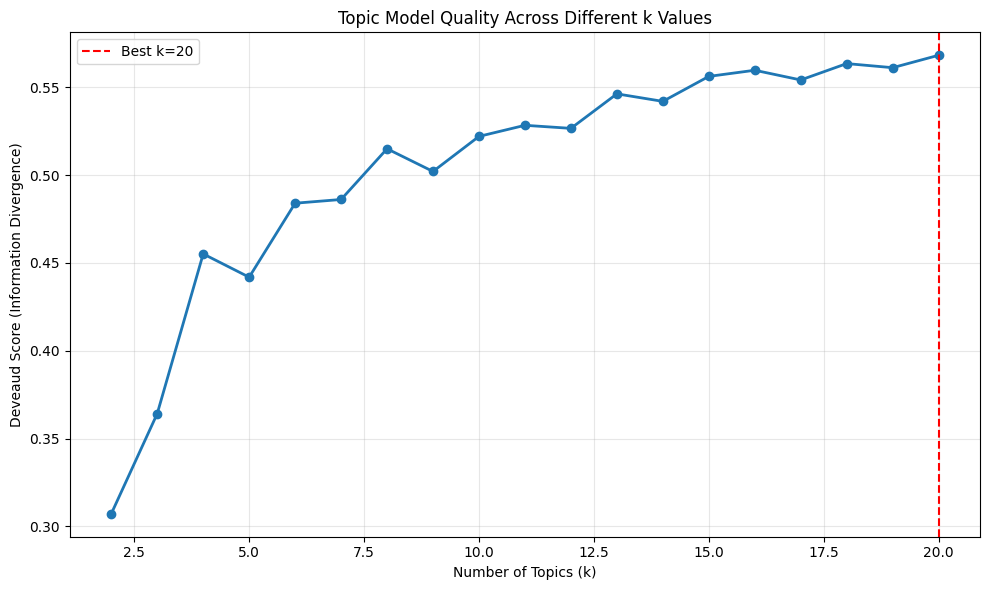

,k_topics,deveaud_score
0,2,0.307150
1,3,0.364185
2,4,0.455147
3,5,0.441890
4,6,0.484026
5,7,0.486145
6,8,0.515022
7,9,0.502102
8,10,0.522077
9,11,0.528392


In [28]:
import matplotlib.pyplot as plt


def find_optimal_k_topics(X, k_range=range(2, 21), n_iter=1500, random_state=42):
    results = []
    best_score = -np.inf
    best_model = None
    best_k = None
    
    for k in k_range:
        print(f"Fitting LDA with k={k} topics...")
        model = lda.LDA(n_topics=k, n_iter=n_iter, random_state=random_state)
        model.fit(X)
        
        topic_word = model.topic_word_
        score = deveaud2014(topic_word)
        
        results.append({"k_topics": k, "deveaud_score": score})
        print(f"  Deveaud score: {score:.4f}")
        
        if score > best_score:
            best_score = score
            best_model = model
            best_k = k
    
    results_df = pd.DataFrame(results)
    
    print("\n" + "=" * 60)
    print(f"Best model: k={best_k} with Deveaud score={best_score:.4f}")
    print("=" * 60)
    
    return best_model, best_k, results_df


best_model, best_k, topic_scores = find_optimal_k_topics(
    X_pooled, k_range=range(2, 21), n_iter=1500, random_state=42
)

plt.figure(figsize=(10, 6))
plt.plot(topic_scores["k_topics"], topic_scores["deveaud_score"], marker="o", linewidth=2)
plt.axvline(x=best_k, color="r", linestyle="--", label=f"Best k={best_k}")
plt.xlabel("Number of Topics (k)")
plt.ylabel("Deveaud Score (Information Divergence)")
plt.title("Topic Model Quality Across Different k Values")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

topic_scores